In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import random
import numpy as np

# Made-up data

In [14]:
nrows = 2000

In [15]:
datum = pd.date_range('2018-01-04', periods= nrows, freq='D')
#datum.to_pydatetime()
#datum.values

In [16]:
customer_id = [random.randint(111,222) for x in range(nrows)]
customer_id[:4]

[136, 156, 163, 151]

In [17]:
d = {'customer_id': customer_id,
     'purchased_on': datum
    }
df = pd.DataFrame(data = d)

In [18]:
df.shape

(2000, 2)

Generate origin so that one customer has always the same origin

In [19]:
org = []
for i in range(df.shape[0]):
    md = df.iloc[i]['customer_id'] % 6
    if md < 3:
        org.append('urban')
    elif md == 3:
        org.append('capital')
    elif md == 4:
        org.append('rural')        
    else:
        org.append('misc')

df['customer_origin'] = org
df.dtypes

customer_id                 int64
purchased_on       datetime64[ns]
customer_origin            object
dtype: object

In [20]:
# one customer = one origin?
df.groupby('customer_id').customer_origin.nunique().sort_values(ascending = False).head(2)

customer_id
222    1
221    1
Name: customer_origin, dtype: int64

Generate higher volumes for GOLD and SILVER segment.

In [21]:
segm = []
for i in range(df.shape[0]):
    md = df.iloc[i]['customer_id'] % 7
    if md < 3:
        segm.append('GOLD')
    elif md < 6:
        segm.append('SILVER')
    else:
        segm.append('BRONZE')

df['customer_segment'] = segm
cat_type = pd.api.types.CategoricalDtype(categories=['BRONZE', 'SILVER', 'GOLD'], ordered=True)
df['customer_segment'] = df['customer_segment'].astype(cat_type)
df.dtypes

customer_id                  int64
purchased_on        datetime64[ns]
customer_origin             object
customer_segment          category
dtype: object

In [22]:
units = []
for i in range(df.shape[0]):
    if df.iloc[i]['customer_segment'] == 'SILVER':
        units.append(np.random.normal(90, 20))
    elif df.iloc[i]['customer_segment'] == 'GOLD':
        units.append(np.random.normal(110, 20))
    else:
        units.append(np.random.normal(70, 15))

df['units_sold'] = units

In [23]:
df.groupby(df.customer_origin).units_sold.describe()

,count,mean,std,min,25%,50%,75%,max
customer_origin,,,,,,,,
capital,323.0,93.485299,24.587855,27.075688,75.400042,94.207711,111.222123,151.645029
misc,333.0,94.727575,23.687612,37.963034,76.720300,93.618241,111.488773,158.069372
rural,318.0,94.282282,24.189889,35.119045,77.323431,95.241256,111.043826,186.241605
urban,1026.0,96.689499,23.842697,34.438451,79.085487,97.131247,113.480793,166.871374


In [24]:
df.groupby(df.customer_segment).units_sold.describe()

,count,mean,std,min,25%,50%,75%,max
customer_segment,,,,,,,,
BRONZE,266.0,69.501598,15.775313,27.075688,59.263005,68.362359,79.283764,117.545176
SILVER,867.0,89.480340,20.025986,33.899640,75.400042,89.410926,103.307290,162.321270
GOLD,867.0,109.409856,20.398933,41.261784,96.383780,109.467809,124.461036,186.241605


In [25]:
df['revenue'] = df.units_sold.apply(lambda val: val * random.normalvariate(mu=10, sigma= 2.5))

In [26]:
df[['units_sold','revenue']].describe()

,units_sold,revenue
count,2000.000000,2000.000000
mean,95.462613,959.225051
std,24.011882,344.546278
min,27.075688,44.700551
25%,77.576658,707.147109
50%,95.872131,919.490568
75%,112.534651,1176.174762
max,186.241605,2450.181565


In [29]:
df.groupby(df.customer_id, as_index=False).customer_segment.nunique().sort_values(ascending= False).head(2)

111    1
110    1
Name: customer_segment, dtype: int64

In [30]:
df.head()

,customer_id,purchased_on,customer_origin,customer_segment,units_sold,revenue
0,136,2018-01-04,rural,SILVER,89.583837,788.584596
1,156,2018-01-05,urban,GOLD,101.069314,1351.488000
2,163,2018-01-06,urban,GOLD,84.139210,1071.585249
3,151,2018-01-07,urban,SILVER,96.434458,782.135120
4,118,2018-01-08,rural,BRONZE,73.595090,623.010847


In [31]:
df.to_excel('sample_data.xlsx', encoding='UTF-8', index= False, float_format="%.2f", sheet_name='sales_data')

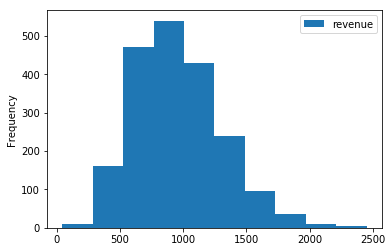

In [32]:
df[['revenue']].plot(kind = 'hist', bins = 10)
plt.show()

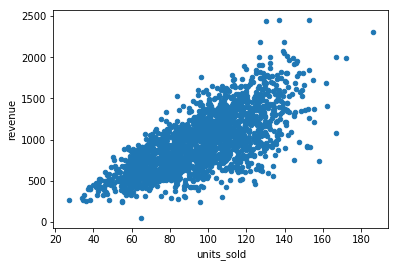

In [33]:
df[['units_sold', 'revenue']].plot(x = 'units_sold', y = 'revenue', kind = 'scatter')
plt.show()

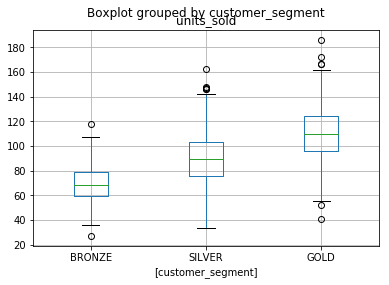

In [34]:
df_units = df[['units_sold', 'customer_segment']]
df_units.boxplot(by = 'customer_segment')
plt.show()

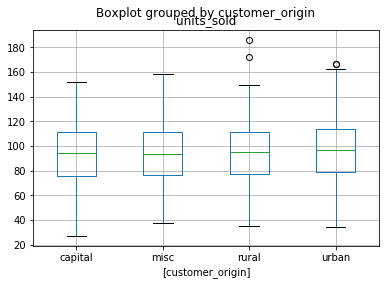

In [35]:
df_orig = df[['units_sold', 'customer_origin']]
df_orig.boxplot(by = 'customer_origin')
plt.show()